# Laplace Filtering

In this tutorial you will learn how to accelerate likelihoods with a Laplace approximation.


# Gaussian likelihood

but with a non-linear prior

In [17]:
def loglikelihood(param):
    return -0.5 * (((param - 1)/0.01)**2).sum(axis=1)


In [18]:
def prior(cube):
    return 10**(cube * 2 - 1)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reference run

for comparison later, lets first use ultranest 'normally':

In [20]:
import ultranest

In [21]:
paramnames = ["p%d" % i for i in range(8)]

In [22]:
sampler = ultranest.ReactiveNestedSampler(paramnames, loglikelihood, transform=prior, vectorized=True)
results = sampler.run()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-0.1   [-0.8237..-0.8237]*| it/evals=18200/96029 eff=19.0319% N=400      0         0   
[ultranest] Likelihood function evaluations: 96029
[ultranest]   logZ = -41.63 +- 0.2287
[ultranest] Effective samples strategy satisfied (ESS = 2924.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 398 minimum live points (dlogz from 0.17 to 0.76, need <0.5)
[ultranest]   logZ error budget: single: 0.31 bs:0.23 tail:0.01 total:0.23 required:<0.50
[ultranest] done iterating.


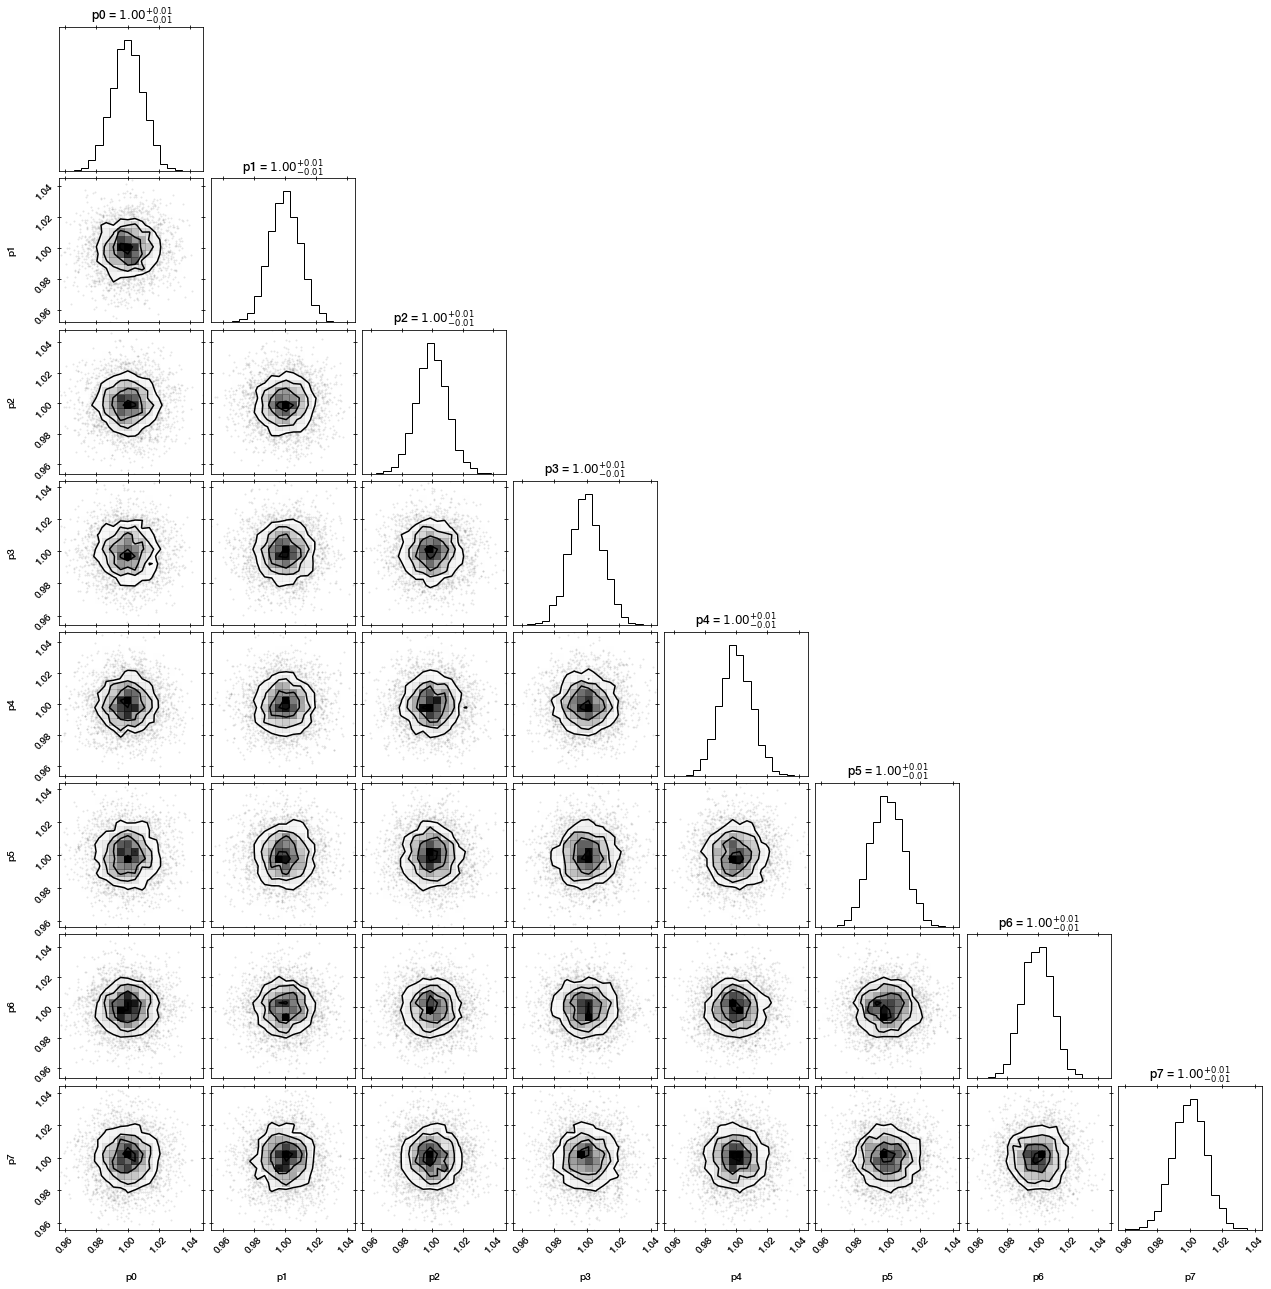

In [23]:
sampler.plot_corner()

## Accelerated sampling

Now we try the same analysis, with the Laplace approximation filter:

In [26]:
# set up sampler as before:
acc_sampler = ultranest.ReactiveNestedSampler(paramnames, loglikelihood, transform=prior, vectorized=True)

# hook in the filter and run:
from ultranest.laplacefilter import LaplaceApproximationFilter
lappr = LaplaceApproximationFilter(acc_sampler, safety=1, verbose=True)
results = acc_sampler.run(viz_callback=lappr.viz_callback)


[ultranest] Sampling 400 live points from prior ...
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 0.00%
quadratic log-likelihood approximation residual: 0.00   .9458..-243788.7202] | it/evals=80/528 eff=62.5000% N=400 
fraction of proposals discarded: 20.66%8288.03 [-1171328.9458..-243788.7202] | it/evals=90/528 eff=70.3125% N=400 
quadratic log-likelihood approximation residual: 0.00   .9458..-243788.7202] | it/evals=160/649 eff=64.2570% N=400 
fraction of proposals discarded: 21.21%
fraction of proposals discarded: 42.72%8184.63 [-1171328.9458..-243788.7202] | it/evals=240/748 eff=68.9655% N=400 
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 34.18%8184.63 [-243629.2397..-111403.8117] | it/evals=280/851 eff=62.0843% N=400 
quadratic log-likelihood approximation residual: 0.00   2397..-111403.8117] | it/evals=320/930 eff=60.3774% N=400 
fraction of proposals discarded: 15.07%8184.63 [-243629.2397..-

fraction of proposals discarded: 42.86%28.37 [-19293.3118..-15452.5599] | it/evals=1440/2776 eff=60.6061% N=400 
fraction of proposals discarded: 42.86%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 28.57%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 63.64%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 63.64%
fraction of proposals discarded: 42.86%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 33.33%28.37 [-19293.3118..-15452.5599] | it/evals=1480/2890 eff=59.4378% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction o

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 80.00%28.37 [-15436.2773..-12887.2907] | it/evals=1840/4072 eff=50.1089% N=400 
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
f

quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 50.00%28.37 [-12885.4785..-11116.2182] | it/evals=2160/5951 eff=38.9119% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of propos

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals 

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals

fraction of proposals discarded: 100.00%2.21 [-11102.1126..-9757.1125] | it/evals=2434/8135 eff=31.4674% N=400 
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarde

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals di

fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%22 [-9754.5526..-8699.7672] | it/evals=2560/9367 eff=28.5491% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fract

fraction of proposals discarded: 100.00%30 [-9754.5526..-8699.7672] | it/evals=2680/10575 eff=26.3391% N=400 
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals d

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%30 [-8697.3088..-7648.3282] | it/evals=2907/13178 eff=22.7500% N=400 
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 10

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 81.25%
fraction of proposals discarded: 91.67%
fraction of proposals discarded: 91.67%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%09 [-7646.1301..-6712.6033] | it/evals=3200/17434 eff=18.7860% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 86.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 93.33%
fraction of proposals discarded: 94.44%
fraction of proposals discarded: 95.24%
fraction of proposals discarded: 94.74%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 73.33%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 100.00%
f

fraction of proposals discarded: 94.74%.09 [-6711.5540..-5842.8408] | it/evals=3400/20582 eff=16.8467% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 91.30%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 94.44%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 94.44%
fraction of proposals discarded: 96.00%
fraction of proposals discarded: 94.12%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 94.74%
fraction of proposals discarded: 93.3

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 91.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 92.86%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 89.47%
fraction of proposals discarded: 88.89%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 100.00%09 [-6711.5540..-5842.8408] | it/evals=3600/24143 eff=15.1624% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 88.24%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 94.12%
fraction of proposals discarded: 100.00%
fraction of proposals d

fraction of proposals discarded: 90.91%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 95.24%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.86%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.86%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 93.75%
fraction of proposals discarded: 92.86%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 91.67%
fraction of proposals discarded: 95.65%
fraction of proposals disc

fraction of proposals discarded: 100.00%09 [-5841.0732..-5214.0503] | it/evals=3909/31546 eff=12.5506% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 85.71%
fraction of proposals d

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals 

fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%09 [-5209.0091..-4573.5186] | it/evals=4107/35682 eff=11.6405% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 

fraction of proposals discarded: 90.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%09 [-5209.0091..-4573.5186] | it/evals=4160/36764 eff=11.4399% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 84.62%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 93.33%
fraction of proposals discarded: 100.00%
fraction of proposals 

fraction of proposals discarded: 100.00%09 [-4572.1273..-3959.5398] | it/evals=4320/39923 eff=10.9303% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 93.75%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 77.78%
fraction of proposals discarded: 90.91%

fraction of proposals discarded: 94.44%
fraction of proposals discarded: 81.82%.09 [-4572.1273..-3959.5398] | it/evals=4422/41734 eff=10.6982% N=400 
fraction of proposals discarded: 92.86%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.31%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00

fraction of proposals discarded: 77.78%
fraction of proposals discarded: 100.00%09 [-3959.3510..-3491.6593] | it/evals=4520/43430 eff=10.5043% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 85.

fraction of proposals discarded: 93.33%.76 [-3959.3510..-3491.6593] | it/evals=4600/44678 eff=10.3889% N=400 
fraction of proposals discarded: 93.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 92.86%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 93.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 91.67%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 88.89%
f

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 100.00%76 [-3959.3510..-3491.6593] | it/evals=4716/46592 eff=10.2096% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 100.00%76 [-3959.3510..-3491.6593] | it/evals=4720/46627 eff=10.2105% N=400 
fraction of proposals discarded: 100.00%
fraction 

fraction of proposals discarded: 92.11%81 [-2228.8314..-1893.6490] | it/evals=5640/54480 eff=10.4290% N=400 
fraction of proposals discarded: 81.61%
fraction of proposals discarded: 87.65%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 0.00%.81 [-2228.8314..-1893.6490] | it/evals=5670/54724 eff=10.4374% N=400 
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 78.64%
fraction of proposals discarded: 87.85%81 [-2228.8314..-1893.6490] | it/evals=5680/54834 eff=10.4347% N=400 
fraction of proposals discarded: 86.61%
fraction of proposals discarded: 87.27%81 [-2228.8314..-1893.6490] | it/evals=5720/55053 eff=10.4660% N=400 
fraction of proposals discarded: 87.85%
fraction of proposals discarded: 89.69%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 82.80%90 [-2228.8314..-1893.6490] | it/evals=5760/5536

fraction of proposals discarded: 80.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 76.92%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 80.00%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%3 [-1149.0524..-958.8254] | it/evals=6760/61199 eff=11.1186% N=400 
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 77.78%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 

fraction of proposals discarded: 62.50%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 75.00%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 0.00%7 [-806.3156..-689.0298] | it/evals=7470/65088 eff=11.5477% N=400 
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 81.82%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 33.33% [-806.3156..-689.0298] | it/evals=7480/65122 eff=11.5571% N=400 
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.00%
fraction of proposals discarded: 87.50%
fraction of

fraction of proposals discarded: 33.33%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 50.00% [-576.5498..-488.9288] | it/evals=8080/67856 eff=11.9782% N=400 
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 42.86%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 10

fraction of proposals discarded: 33.33%[-289.2174..-242.2098] | it/evals=9200/72104 eff=12.8305% N=400 
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 57.14%[-289.2174..-242.2098] | it/evals=9240/72205 eff=12.8682% 

fraction of proposals discarded: 84.54%[-123.2522..-108.1770] | it/evals=10560/76621 eff=13.8544% N=400 
fraction of proposals discarded: 73.33%
fraction of proposals discarded: 73.27%[-123.2522..-108.1770] | it/evals=10600/76823 eff=13.8702% N=400 
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 100.00%-108.1331..-92.1347] | it/evals=10640/76924 eff=13.9041% N=400 
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 61.82%
fraction of proposals discarded: 70.80%[-108.1331..-92.1347] | it/evals=10680/77036 eff=13.9360% N=400 
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 65.38%[-108.1331..-92.1347] | it/evals=10710/77149 eff=13.9546% N=400 
fraction of proposals discarded: 72.41%[-108.1331..-92.1347] | it/evals=10720/77253 eff=13.9487% N=400 
fraction of proposals discarded: 57.27%-108.1331..-92.1347] | it/evals=10760/77369 eff=13.9797% N=400 
quadratic log-likelihood approximation

fraction of proposals discarded: 33.33%-77.9264..-65.1246] | it/evals=11280/79055 eff=14.3411% N=400 
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 70.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 45.45%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 100.00%77.9264..-65.1246] | it/evals=11320/79180 eff=14.3691% N=400 
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 6

fraction of proposals discarded: 100.00%5.0617..-55.1261] | it/evals=11600/80087 eff=14.5570% N=400 
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 87.50%
fraction of proposals discarded: 50.00%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 20.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 50

fraction of proposals discarded: 40.00%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 75.00%8.4299..-23.9437] | it/evals=12920/84311 eff=15.3973% N=400 
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 63.64%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 77.78%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 75.00%
fraction of proposa

fraction of proposals discarded: 80.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 42.86%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 75.00%0.1432..-16.9521] | it/evals=13560/86780 eff=15.6981% N=400 
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 70.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 70.00%
fraction of proposa

fraction of proposals discarded: 80.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 91.67%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 75.00%.3247..-8.8606] | it/evals=14720/90624 eff=16.3149% N=400 
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 77.78%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 44.44%
fraction of proposals discarded: 45.45%
fraction of proposals discarded: 66.67%
fraction of proposa

fraction of proposals discarded: 66.67%
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 83.33%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 20.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 70.00%
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 42.86%2900..-6.3526] | it/evals=15080/91750 eff=16.5079% N=400 
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 90.91%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 42.86%
fraction of proposals discarded: 85.71%
fraction of proposals d

fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 50.00%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 67.97%
fraction of proposals discarded: 78.12%.4771..-4.4709]*| it/evals=15840/94456 eff=16.8410% N=400 
fraction of proposals discarded: 73.44%.3569..-4.3562]*| it/evals=15880/94584 eff=16.8606% N=400 
quadratic log-likelihood approximation residual: 0.00    it/evals=15920/94712 eff=16.8801% N=400 
fraction of proposals discarded: 50.00%.2112..-4.2057]*| it/evals=15930/94712 eff=

fraction of proposals discarded: 65.62%.4250..-3.4248]*| it/evals=16240/95845 eff=17.0150% N=400 
fraction of proposals discarded: 70.31%.3452..-3.3445]*| it/evals=16280/95973 eff=17.0341% N=400 
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 66.95%.2613..-3.2587]*| it/evals=16320/96101 eff=17.0531% N=400 
fraction of proposals discarded: 61.21%
quadratic log-likelihood approximation residual: 0.00    it/evals=16360/96335 eff=17.0532% N=400 
fraction of proposals discarded: 100.00%1264..-3.1234]*| it/evals=16400/96335 eff=17.0949% N=400 
fraction of proposals discarded: 62.50%
fraction of proposals discarded: 44.44%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 53.85%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 44.44%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 77.78%
fraction of 

fraction of proposals discarded: 83.33%
fraction of proposals discarded: 37.50%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 71.17%
fraction of proposals discarded: 76.42%.3877..-2.3875]*| it/evals=16840/97821 eff=17.2858% N=400 
fraction of proposals discarded: 68.75%.3356..-2.3340]*| it/evals=16880/97927 eff=17.3080% N=400 
fraction of proposals discarded: 77.88%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 33.33%.2835..-2.2825]*| it/evals=16920/98143 eff=17.3107% N=400 
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 28.57%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 60.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 85.71%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 25.00%
fraction of proposals discarded: 50.00%.2323..-2.2312]*| it/evals=16960/98185 eff=17.3442% N=400 
fraction of pr

fraction of proposals discarded: 71.43%
fraction of proposals discarded: 60.00%
quadratic log-likelihood approximation residual: 0.00   
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 70.00%
fraction of proposals discarded: 50.00%.5290..-1.5268]*| it/evals=17560/100207 eff=17.5940% N=400 
fraction of proposals discarded: 71.43%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 88.89%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 57.14%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 0.00%
fraction of proposals discarded: 42.86%
fraction of proposals discarded: 25.00%
fr

fraction of proposals discarded: 50.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 75.00%
fraction of proposals discarded: 40.00%
fraction of proposals discarded: 66.67%.0680..-1.0680]*| it/evals=18160/102236 eff=17.8326% N=400 
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 33.33%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 80.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 50.00%
fraction of proposals discarded: 66.67%
fraction of proposals discarded: 100.00%
fraction of proposals discarded: 66.67%
fraction of 

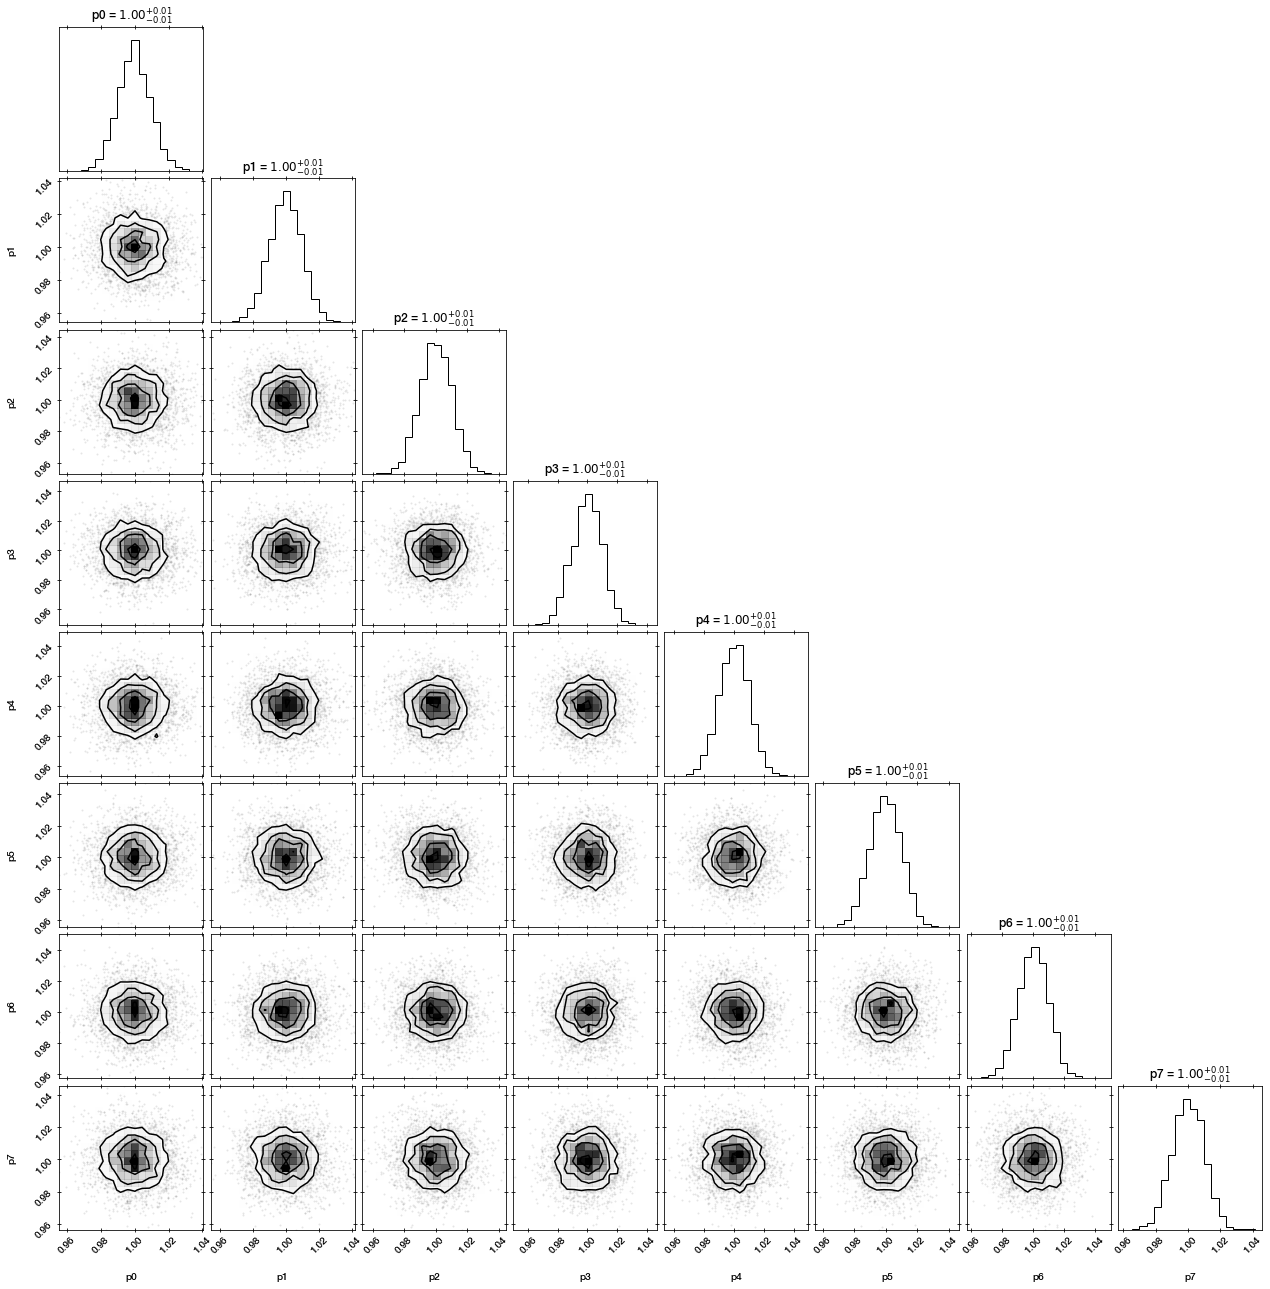

In [15]:
acc_sampler.plot_corner()

# Speed-up

Speed-up of Laplace approximation filter:

In [28]:
print("%.1f%% skipped (%d likelihood evaluations skipped of %d total)" % (
    (lappr.ncalls_skipped * 100 / acc_sampler.results['ncall'],
     lappr.ncalls_skipped, acc_sampler.results['ncall'],
    )))

81.3% skipped (84158 likelihood evaluations skipped of 103488 total)


## How it works & Limitations

A surrogate model for the likelihood is constructed during the run. These days, it may be popular to use machine learning to do this. Here, however, the approach is much simpler: A quadratic function if fitted to the log-likelihood of the live points. Least squares makes this quite stable and fast.

For points proposed by the nested sampling algorithms, the learned approximation is used to predict the expected log-likelihood. If this falls below the current nested sampling likelihood threshold, considering also the prediction error, the proposed point is skipped. If it could be near or above the current nested sampling likelihood threshold, the original log-likelihood function
is called.

This leads to speed-ups in slow models, because the real model does not need to be evaluated. But it only helps if the proposal efficiency is low, if you see high efficiencies already, you do not need this.

The speed-up and fraction skipped is higher, the more the likelihood behaves like a multi-variate Gaussian, as often the case in the high-data regime (see the Bernstein–von Mises theorem), in which case the log-likelihood is a quadratic function. 

Because the approximation fit error is considered, deviations from this assumptions should not cause biases. The safety parameter can be adjusted to balance between efficiency and safety.


For more details, see the API documentation of `ultranest.laplacefilter.LaplaceApproximationFilter`:

https://johannesbuchner.github.io/UltraNest/ultranest.html#module-ultranest.laplace